In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [3]:
from keras.datasets import cifar10
(x_train_rgb,y_train),(x_test_rgb,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:

def rgb_to_gray(img):
  R, G, B = img[:,:,:,0], img[:,:,:,1], img[:,:,:,2]
  imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
  return imgGray

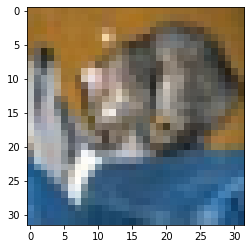

In [64]:
x_train_gray =rgb_to_gray(x_train_rgb)
x_test_gray = rgb_to_gray(x_test_rgb)

plt.imshow(x_train_gray[7])
x_train_gray.shape
x_test_gray = x_test_gray/255
x_train_gray = x_train_gray/255

In [6]:
print(x_train_gray.shape)
x_train = x_train_gray.reshape(x_train_gray.shape[0],32*32)
x_test = x_test_gray.reshape(x_test_gray.shape[0],32*32)
print(x_train[4])
print(x_train.shape)

(50000, 32, 32)
[0.70213725 0.6942949  0.72408745 ... 0.30642549 0.29074078 0.29858314]
(50000, 1024)


#pca

In [7]:
def plot_comp_var(X):
  cov_mat = np.cov(X.T)
  eig_vals = np.linalg.eig(cov_mat)[0]
  eig_vals_sort = [(np.abs(eig_vals[i])) for i in range(len(eig_vals))]
  cum_exp_val = np.cumsum(eig_vals_sort/sum(eig_vals))
  return cum_exp_val

#cov_mat = np.cov(x_train.t)
#eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#print('Eigenvectors n%s' %eig_vecs)
#print('nEigenvalues n%s' %eig_vals)
#eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
#print('Eigenvalues in descending order:')
#for i in eig_pairs:
  #print(i[0])

In [8]:
def pca_n_dec(X,X1,n):#n tedad abad ba arzeshi ke mikhahim dashte bashim
  cov_mat = np.cov(X.T)
  eig_vals, eig_vecs = np.linalg.eig(cov_mat)
  eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
  v = eig_pairs[:n]
  y=[]
  for i in v:
    y.append(i[1])
  v_tr = np.array(y)
  x=[]
  for i in range(len(X1)):
    x += [np.dot(v_tr,X1[i])]
  x_out_n=np.array(x)
  return x_out_n
  

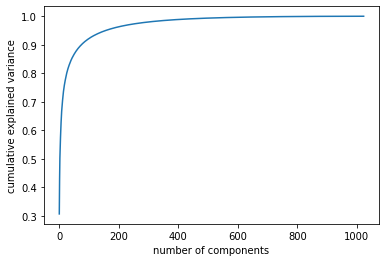

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

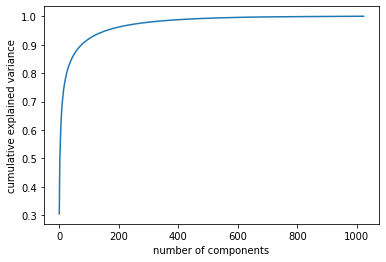

In [9]:
plt.plot(plot_comp_var(x_train))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [10]:
x_train_150 = pca_n_dec(x_train,x_train,150)
x_test_150 = pca_n_dec(x_train,x_test,150)
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
print(y_train.shape)
type(x_test_150)

(50000, 10)


numpy.ndarray

In [11]:
type(x_train)
x_test_150

array([[12.3886264 , -3.7476396 , -4.7723124 , ...,  0.14441547,
         0.1279242 , -0.30042334],
       [19.52402317,  1.76994513, -6.94289842, ..., -0.25142987,
        -0.10662417,  0.10408034],
       [16.34788943,  1.2446946 , -6.25007278, ..., -0.14471787,
         0.09474374, -0.11989577],
       ...,
       [ 5.22699043, -5.45874181, -3.560448  , ..., -0.21380935,
         0.2407724 ,  0.10635358],
       [11.37022816, -5.63097355, -6.11706903, ..., -0.11533163,
        -0.23283612, -0.02724628],
       [13.43405463, -3.04044615, -2.99041191, ...,  0.09943442,
        -0.0974973 ,  0.137962  ]])

In [89]:
from tensorflow.keras import Sequential, layers, losses
model1 = Sequential([
    layers.Input(shape=(150)),
    layers.Dense(32*32,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')                       
])
model1.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 1024)              154624    
                                                                 
 dense_47 (Dense)            (None, 32)                32800     
                                                                 
 dense_48 (Dense)            (None, 10)                330       
                                                                 
Total params: 187,754
Trainable params: 187,754
Non-trainable params: 0
_________________________________________________________________


In [16]:
import datetime as dt
t0_relu = dt.datetime.now()
train_model1 = model1.fit(x_train_150 ,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_relu = dt.datetime.now()
print(t1_relu-t0_relu)

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3044 - accuracy: 0.2788 - val_loss: 0.2813 - val_accuracy: 0.3408
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2678 - accuracy: 0.3854 - val_loss: 0.2632 - val_accuracy: 0.3966
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2488 - accuracy: 0.4414 - val_loss: 0.2520 - val_accuracy: 0.4282
Epoch 4/100
313/313 [==============================] - 2s 8ms/step - loss: 0.2345 - accuracy: 0.4840 - val_loss: 0.2486 - val_accuracy: 0.4374
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2216 - accuracy: 0.5206 - val_loss: 0.2413 - val_accuracy: 0.4647
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2098 - accuracy: 0.5546 - val_loss: 0.2404 - val_accuracy: 0.4692
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 0.1987 - accuracy: 0.5850 - val_loss: 0.2396 - val_accuracy: 0.4725

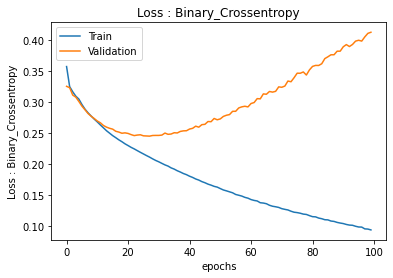

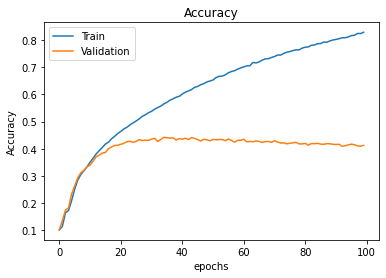

In [13]:
plt.plot(train_model1.history['loss'])
plt.plot(train_model1.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model1.history['accuracy'])
plt.plot(train_model1.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [14]:
test_loss,test_accuracy = model1.evaluate(x_test_150,y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4111 - accuracy: 0.4021
0.4111078083515167
0.40209999680519104


#auto_encoder

In [76]:
import keras
input_img = keras.Input(shape=(32*32,))
encoded1 = layers.Dense(512, activation='relu')(input_img)
encoded2 = layers.Dense(256, activation='relu')(encoded1)
encoded3 = layers.Dense(150, activation='relu')(encoded2)

decoded1 = layers.Dense(256, activation='relu')(encoded3)
decoded2 = layers.Dense(512, activation='relu')(decoded1)
decoded3 = layers.Dense(32*32, activation='sigmoid')(decoded2)
autoencoder = keras.Model(input_img, decoded3)
encoder = keras.Model(input_img, encoded3)

encoded_input = keras.Input(shape=(150,))
decoder_layer = autoencoder.layers[-1]
#decoder = keras.Model(encoded_input, decoded3)

autoencoder.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
    #metrics=['mae','accuracy'] 
)
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1024)]            0         
                                                                 
 dense_40 (Dense)            (None, 512)               524800    
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                                 
 dense_42 (Dense)            (None, 150)               38550     
                                                                 
 dense_43 (Dense)            (None, 256)               38656     
                                                                 
 dense_44 (Dense)            (None, 512)               131584    
                                                                 
 dense_45 (Dense)            (None, 1024)              5253

In [77]:
import datetime as dt
t0_relu = dt.datetime.now()
train_autoencoder = autoencoder.fit(x_train ,x_train,epochs=50, validation_split=0.2,batch_size=512)
t1_relu = dt.datetime.now()
print(t1_relu-t0_relu)

Epoch 1/50
79/79 [==============================] - 9s 97ms/step - loss: 0.0409 - mae: 0.1618 - val_loss: 0.0298 - val_mae: 0.1357
Epoch 2/50
79/79 [==============================] - 7s 92ms/step - loss: 0.0257 - mae: 0.1244 - val_loss: 0.0219 - val_mae: 0.1126
Epoch 3/50
79/79 [==============================] - 7s 92ms/step - loss: 0.0198 - mae: 0.1058 - val_loss: 0.0183 - val_mae: 0.1012
Epoch 4/50
79/79 [==============================] - 8s 105ms/step - loss: 0.0175 - mae: 0.0985 - val_loss: 0.0186 - val_mae: 0.1028
Epoch 5/50
79/79 [==============================] - 8s 97ms/step - loss: 0.0168 - mae: 0.0966 - val_loss: 0.0154 - val_mae: 0.0917
Epoch 6/50
79/79 [==============================] - 7s 92ms/step - loss: 0.0151 - mae: 0.0906 - val_loss: 0.0144 - val_mae: 0.0881
Epoch 7/50
79/79 [==============================] - 7s 92ms/step - loss: 0.0144 - mae: 0.0884 - val_loss: 0.0138 - val_mae: 0.0867
Epoch 8/50
79/79 [==============================] - 7s 92ms/step - loss: 0.0137 - 

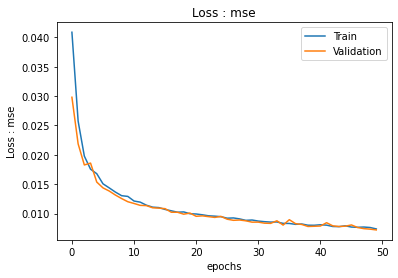

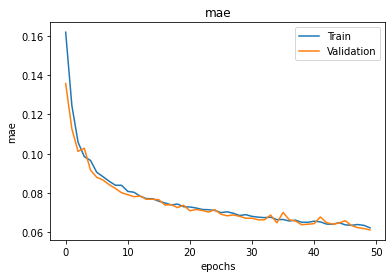

In [78]:
plt.plot(train_autoencoder.history['loss'])
plt.plot(train_autoencoder.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : mse')
plt.title('Loss : mse')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_autoencoder.history['mae'])
plt.plot(train_autoencoder.history['val_mae'])
plt.xlabel('epochs')
plt.ylabel('mae')
plt.title('mae')
plt.legend(['Train', 'Validation'])
plt.show()


In [95]:
test_loss_mse,test_mae = autoencoder.evaluate(x_test,x_test)
print(test_loss_mse)
print(test_mae)

313/313 [==============================] - 2s 6ms/step - loss: 0.0073 - mae: 0.0616
0.007268494460731745
0.06159108877182007


In [84]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

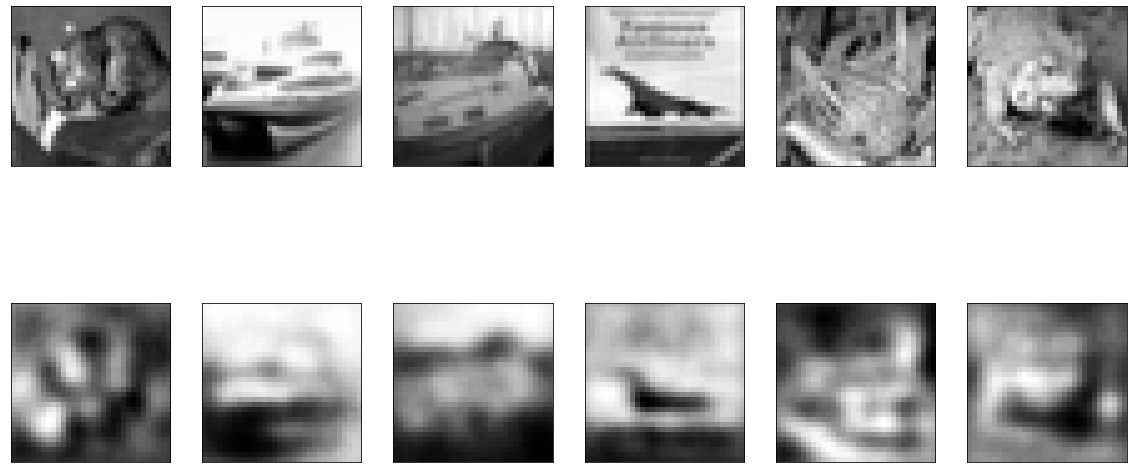

In [102]:
n = 6  # How many digits we will display
plt.figure(figsize=(20, 10))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [90]:
import datetime as dt
encoded_imgs_train = encoder.predict(x_train)
t0_relu = dt.datetime.now()
train_model_auto = model1.fit(encoded_imgs_train ,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_relu = dt.datetime.now()
print(t1_relu-t0_relu)

Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 0.3147 - accuracy: 0.2201 - val_loss: 0.2970 - val_accuracy: 0.2661
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2929 - accuracy: 0.2760 - val_loss: 0.2908 - val_accuracy: 0.2953
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2862 - accuracy: 0.3010 - val_loss: 0.2823 - val_accuracy: 0.3223
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2796 - accuracy: 0.3249 - val_loss: 0.2796 - val_accuracy: 0.3219
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2739 - accuracy: 0.3457 - val_loss: 0.2747 - val_accuracy: 0.3419
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 0.2695 - accuracy: 0.3588 - val_loss: 0.2727 - val_accuracy: 0.3556
Epoch 7/100
313/313 [==============================] - 2s 8ms/step - loss: 0.2651 - accuracy: 0.3713 - val_loss: 0.2657 - val_accuracy: 0.3716

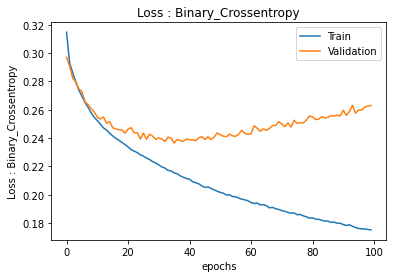

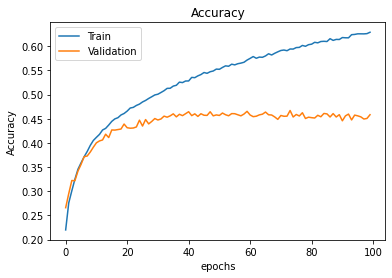

In [91]:
plt.plot(train_model_auto.history['loss'])
plt.plot(train_model_auto.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss : Binary_Crossentropy')
plt.title('Loss : Binary_Crossentropy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(train_model_auto.history['accuracy'])
plt.plot(train_model_auto.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [93]:

test_loss,test_accuracy = model1.evaluate(encoded_imgs,y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2657 - accuracy: 0.4453
0.2657090425491333
0.44530001282691956


#The correlation matrix

In [105]:
data = pd.read_csv('data.csv')
print(data.info())
min_price = min(data['price'])
max_price = max(data['price'])
delta = max_price-min_price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [109]:
def ready_to_process(data) :
  data_object = data.select_dtypes(include='object')
  data_number = data.drop(columns= data_object.keys())
  data_object = data_object.fillna('NA')
  scaler = MinMaxScaler()
  for n in data_object.keys():
    x=data_object[n]
    x= x.astype("category").cat.codes
    x = scaler.fit_transform(x.values.reshape((-1, 1)))
    data_object[n]=x
  for n in data_number.keys():
    data_number[n]= data_number[n].fillna(data_number.mean())
    data_number[n] = scaler.fit_transform(data_number[n].values.reshape((-1, 1)))
  return pd.concat([data_object , data_number],axis=1)

[]

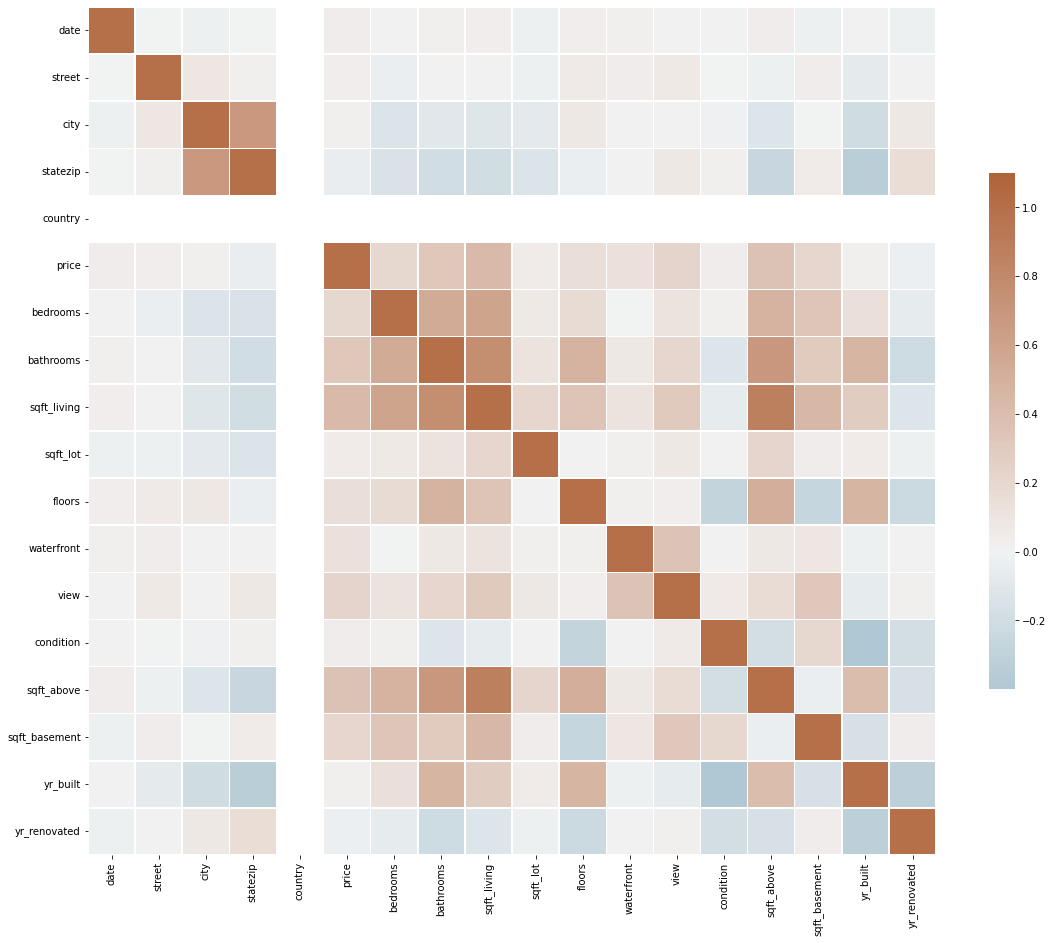

In [138]:
import seaborn as sns
Data = ready_to_process(data)
plt.figure(figsize=(19, 19))
corr = Data.corr()
cmap = sns.diverging_palette(230,30, as_cmap=True)
sns.heatmap(corr,cmap=cmap ,vmax=1.1, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.plot()

#bar_plot_important

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
Y = Data['price'].to_numpy().reshape((-1, 1))
X = Data.drop(columns='price').to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

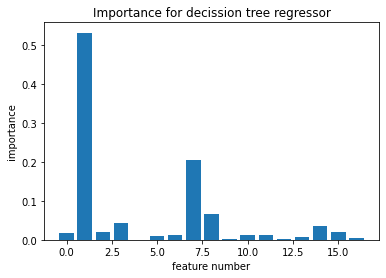

In [142]:
model = DecisionTreeRegressor()

model.fit(X_train, Y_train)

importance = model.feature_importances_

plt.bar([x for x in range(len(importance))], abs(importance))
plt.xlabel('feature number')
plt.ylabel('importance')
plt.title('Importance for decission tree regressor')
plt.show()

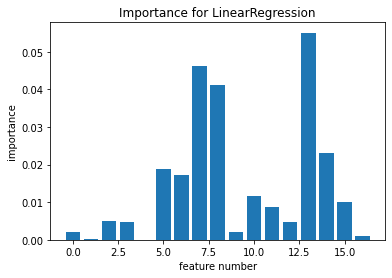

In [152]:
model = LinearRegression()
model.fit(X_train, Y_train)
importance = model.coef_

plt.bar([x for x in range(len(importance[0]))], abs(importance[0]))
plt.xlabel('feature number')
plt.ylabel('importance')
plt.title('Importance for LinearRegression')
plt.show()